Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


from sklearn import metrics 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

%matplotlib inline

In [2]:
data = pd.read_csv('/content/Medical Insurance Dataset.csv')
data.head()

,age,gender,bmi,no. of children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              185 non-null    int64  
 1   gender           185 non-null    object 
 2   bmi              185 non-null    float64
 3   no. of children  185 non-null    int64  
 4   smoker           185 non-null    object 
 5   region           185 non-null    object 
 6   charges          185 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 10.2+ KB


From above we can see that,there are no missing/null values as such

In [4]:
data['region'].value_counts().sort_values()

northeast    45
southeast    46
southwest    46
northwest    48
Name: region, dtype: int64

In [5]:
data['no. of children'].value_counts().sort_values()

5     2
4     4
3    22
2    26
1    47
0    84
Name: no. of children, dtype: int64

Converting Categorical Features to Numerical

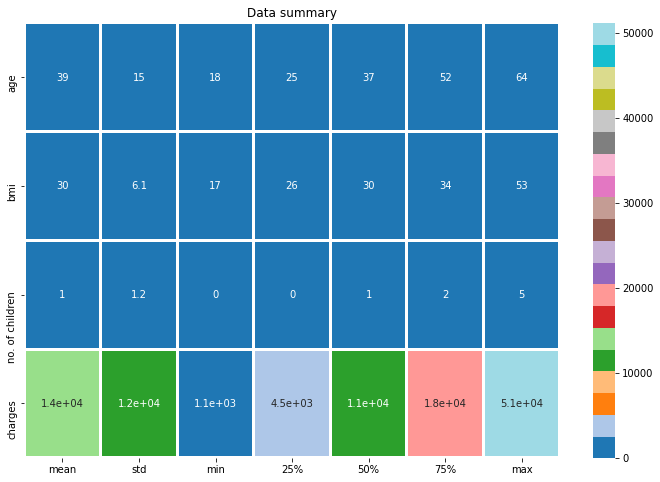

In [6]:
clean_data = {'gender' : {'male' :0, 'female' : 1},'smoker' : {'no' : 0 , 'yes' : 1},'region' : {'northwest' : 0, 'northeast' : 1, 'southeast' : 2 ,'southwest' : 3}}
data_copy = data.copy()
data_copy.replace(clean_data, inplace = True)
plt.figure(figsize=(12,8))
sns.heatmap(data.describe()[1:].transpose(),
            annot=True,linecolor="w",
            linewidth=2,cmap=sns.color_palette("tab20"))
plt.title("Data summary")
plt.show()

In [7]:
data_copy.describe()

,age,gender,bmi,no. of children,smoker,region,charges
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,38.783784,0.491892,30.220676,1.032432,0.221622,1.486486,13896.735406
std,14.583968,0.501291,6.127495,1.201913,0.416465,1.128235,12398.906271
min,18.000000,0.000000,17.290000,0.000000,0.000000,0.000000,1137.011000
25%,25.000000,0.000000,25.840000,0.000000,0.000000,0.000000,4454.402650
50%,37.000000,0.000000,30.495000,1.000000,0.000000,1.000000,10577.087000
75%,52.000000,1.000000,34.100000,2.000000,0.000000,2.000000,17929.303370
max,64.000000,1.000000,52.580000,5.000000,1.000000,3.000000,51194.559140


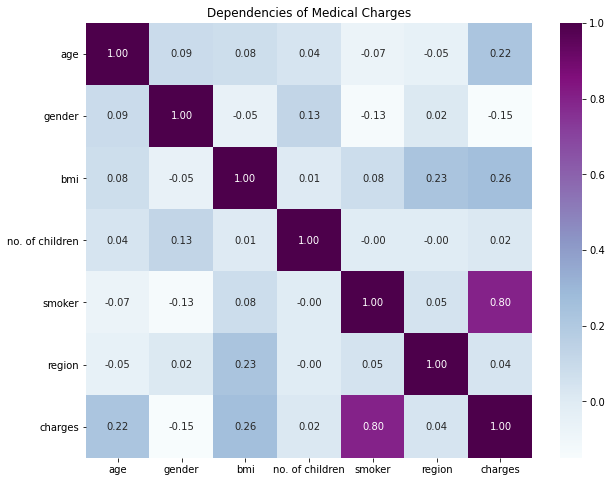

In [8]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

Showing the percentage of Smoker and Non Smoker persons of the dataset using pi-chart

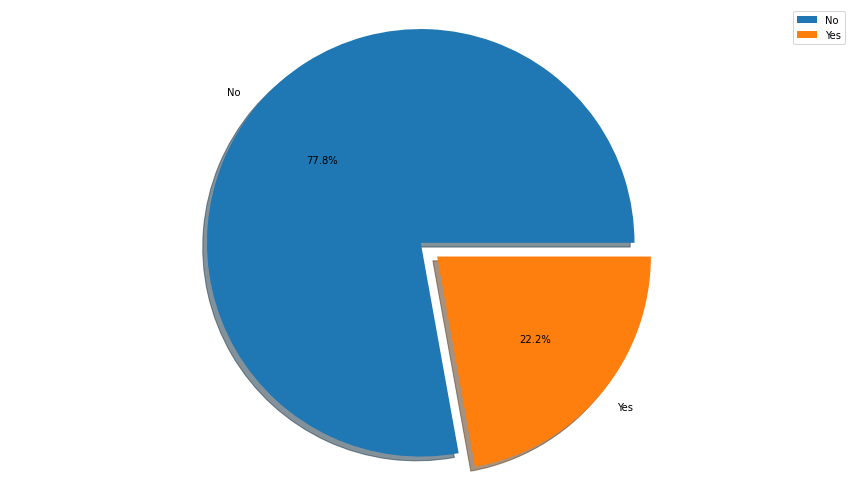

In [9]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['smoker'].value_counts(), explode=explode,labels=['No','Yes'], autopct='%1.1f%%',
        shadow=True)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

Smoker,BMI and Age are most important factor that determines is - "Charges"
Also we can see that Gender,Children and Region do not affect the Charges.

In [10]:
print(data['gender'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

female    91
male      94
Name: gender, dtype: int64
yes     41
no     144
Name: smoker, dtype: int64
northeast    45
southeast    46
southwest    46
northwest    48
Name: region, dtype: int64


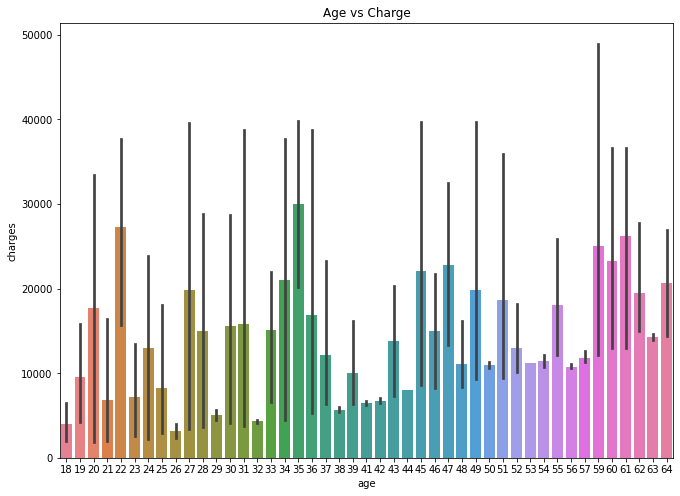

In [11]:
plt.figure(figsize=(11,8))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')

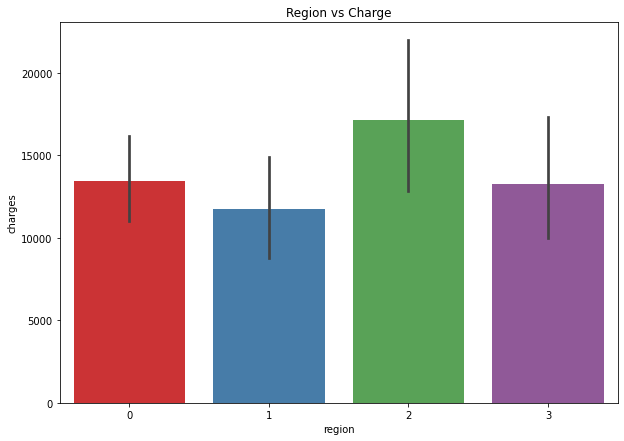

In [12]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set1')

Text(0.5, 1.0, 'BMI vs Charge')

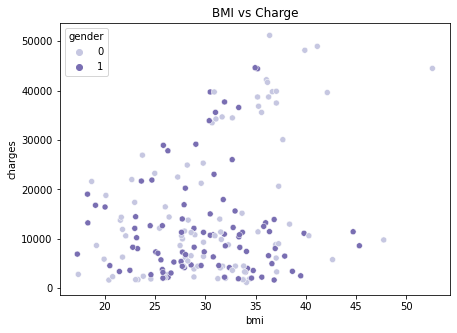

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='gender',data=data_copy,palette='Purples')
plt.title('BMI vs Charge')

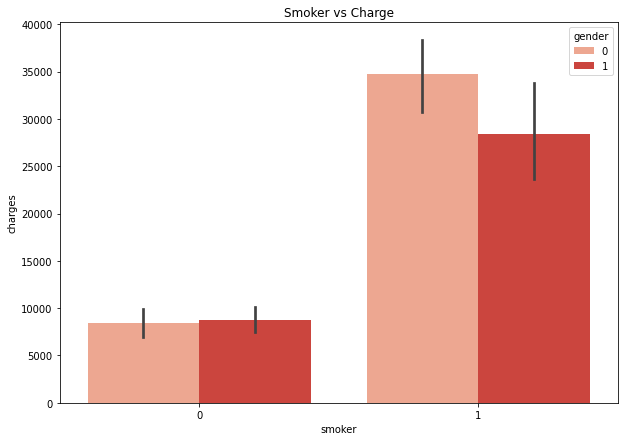

In [14]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Reds',hue='gender')

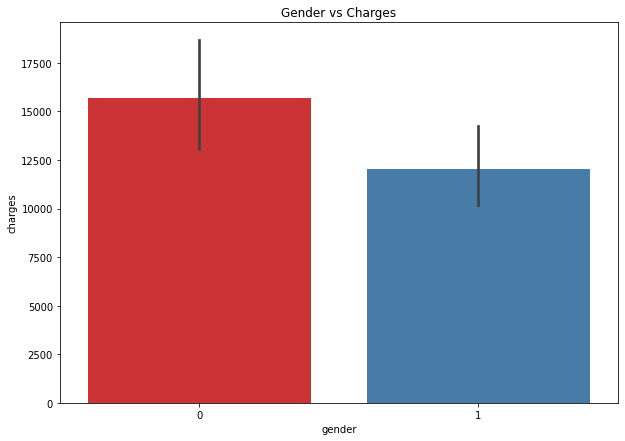

In [15]:
plt.figure(figsize=(10,7))
plt.title('Gender vs Charges')
sns.barplot(x='gender',y='charges',data=data_copy,palette='Set1')

Plotting Graphs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

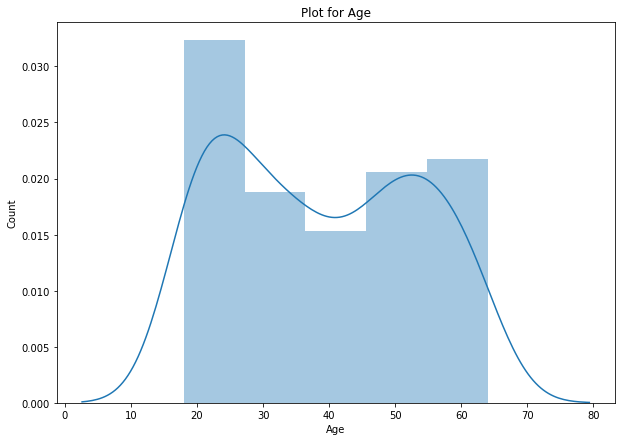

In [16]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

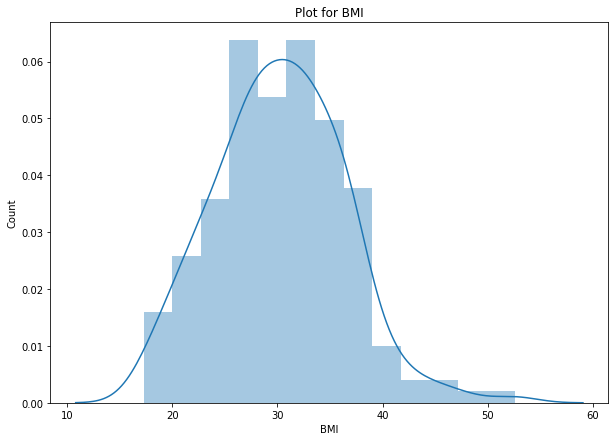

In [17]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

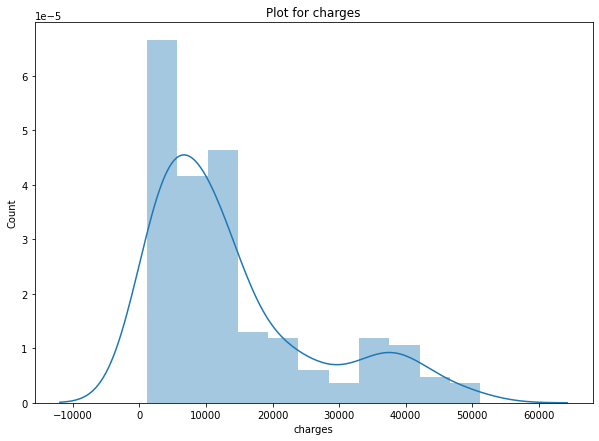

In [18]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

Preparing Data - Scaling BMI and Charges Column before proceeding with Prediction

In [19]:
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,gender,bmi,no. of children,smoker,region,charges
0,-1.360225,1,-0.379759,0,1,3,0.241658
1,-1.428979,0,0.580817,1,0,2,-0.984297
2,-0.741434,0,0.454813,3,0,2,-0.764012
3,-0.397661,0,-1.229878,0,0,0,0.654064
4,-0.466416,0,-0.219390,0,0,0,-0.811128


In [20]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (148, 6)
Size of y_train :  (148, 1)
Size of X_test :  (37, 6)
Size of Y_test :  (37, 1)


Linear Regression

In [21]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: user 3.13 ms, sys: 158 µs, total: 3.29 ms
Wall time: 20.1 ms


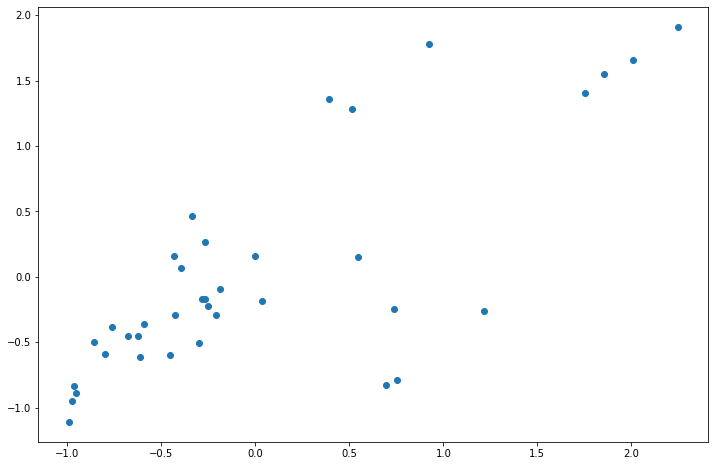

In [22]:
predictions1 = linear_reg.predict(X_test)
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions1)

In [23]:
from sklearn.metrics import r2_score


y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = metrics.r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = metrics.r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear_reg_test)))



print('MAE:', metrics.mean_absolute_error(y_test, predictions1))

print('MSE:', metrics.mean_squared_error(y_test, predictions1))

print('RMSE : {0:.3f}'.format(rmse_linear))

print('R2 test_data : {0:.3f}'.format(r2_score_linear_reg_test))

MAE: 0.416854825304789
MSE: 0.3482773507477842
RMSE : 0.590
R2 test_data : 0.553


Visualizing The Result of Linear Regression

Text(0.5, 1.0, 'Cross-validated Prediction accuracy of Charges')

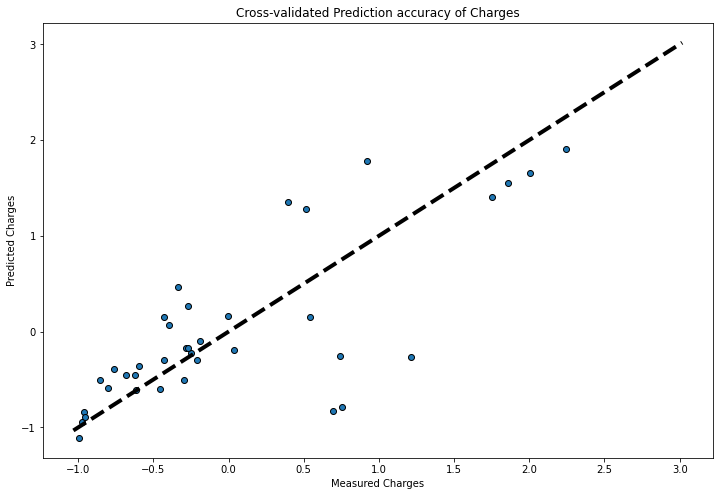

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, predictions1, edgecolors=(0,0,0))
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel("Measured Charges")
plt.ylabel("Predicted Charges")
plt.title("Cross-validated Prediction accuracy of Charges")

Random Forest Regression

Creating and Training the Model



In [25]:
randomforest = RandomForestRegressor(n_estimators = 100, random_state = 20)
randomforest.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

Evaluation of the Model

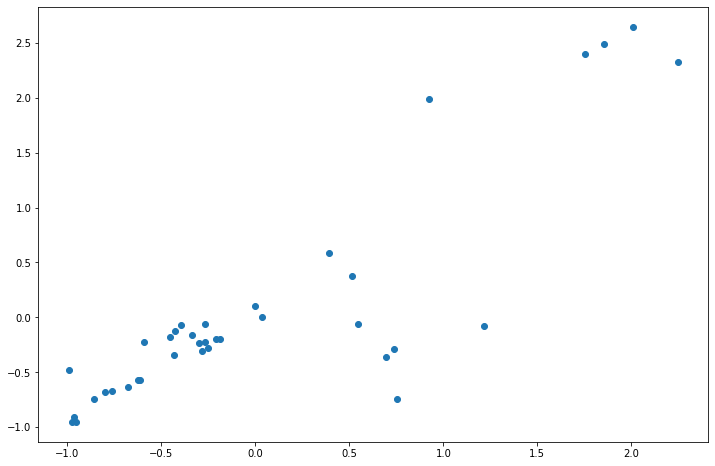

In [26]:
predictions2 = randomforest.predict(X_test)
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions2)

In [27]:
rmse_rf = (np.sqrt(metrics.mean_squared_error(y_train, y_pred_linear_reg_train)))

print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))
print('R2 test_data: ', round(r2_score(y_test,predictions2), 3))

MAE: 0.323846203718791
MSE: 0.26164959415888445
RMSE: 0.5115169539310349
R2 test_data:  0.664


Visualising the Random Forest Regression Result

Text(0.5, 1.0, 'Cross-validated Prediction accuracy of Charges')

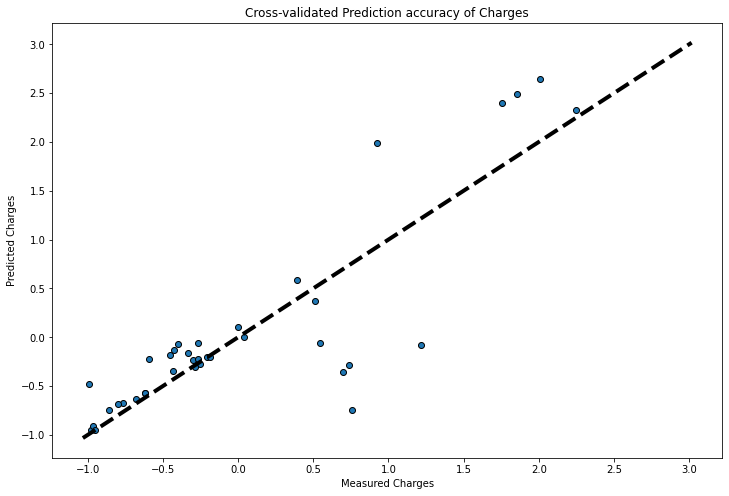

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, predictions2, edgecolors=(0,0,0))
plt.plot([y.min(),y.max()],[y.min(),y.max()],'k--',lw=4)
plt.xlabel("Measured Charges")
plt.ylabel("Predicted Charges")
plt.title("Cross-validated Prediction accuracy of Charges")